# Install Albumentations and Change Directory

In [ ]:
!pip install -q -U albumentations
!echo "$(pip freeze | grep albumentations) is successfully installed"

     |████████████████████████████████| 81kB 5.8MB/s 
     |████████████████████████████████| 38.2MB 1.2MB/s 
     |████████████████████████████████| 952kB 45.3MB/s 
albumentations==0.5.2 is successfully installed


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/DD2424/

# Imports

In [ ]:
import dataset
import utils
import model
import numpy as np

import torch
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm.notebook import tqdm
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from model import UNET
from utils import (load_checkpoint, save_checkpoint, get_loaders)
import matplotlib.pyplot as plt
from torch.autograd import Variable
torch.cuda.empty_cache()

# Training Functions

In [ ]:
class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceBCELoss, self).__init__()

    def forward(self, inputs, targets, smooth=1e-4):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        inputs = torch.sigmoid(inputs)       
        
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        intersection = (inputs * targets).sum()                            
        dice_loss = 1 - (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)

        return dice_loss

In [ ]:
def train_fn(loader, model, optimizer, loss_fn, scaler, epoch, num_epochs, acc_max):
    
    loss_vector = []
    acc_vector = []

    loop = tqdm(loader)

    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device=DEVICE)
        targets = targets.float().unsqueeze(1).to(device=DEVICE)

        # forward
        with torch.cuda.amp.autocast():
            predictions = model(data)
            
            # ------------------ Loss --------------------------------------#
            # Binary Cross Entropy Loss
            bce = nn.BCEWithLogitsLoss()
            loss = bce(predictions, targets)
            loss_vector.append(loss.item())


            # ------------------ Accuracy ----------------------------------#
            dice_loss = loss_fn(predictions, targets)
            acc = 1 - dice_loss
            acc_vector.append(acc.item())

            if acc > acc_max:
              acc_max = acc
              print("...saving model - Acc: ", acc_max)
              torch.save(model.state_dict(), "adam_bce.pth")

        # backward
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # update tqdm loop
        loop.set_description(f"Epoch [{epoch+1}/{num_epochs}]")
        loop.set_postfix(loss=loss.item(), acc=acc.item())
        
    return loss_vector, acc_vector, acc_max

In [ ]:
def train(train_loader, model, optimizer, loss_fn, num_epochs, device):
    
        scaler = torch.cuda.amp.GradScaler()

        loss_epoch = []
        acc_epoch = []

        acc_max = 0.7

        for epoch in range(num_epochs):

            loss_vector, acc_vector, acc_max = train_fn(train_loader, model, optimizer, loss_fn, scaler, epoch, num_epochs, acc_max)
            
            # ------------------ Loss --------------------------------------#
            mean_loss = sum(loss_vector)/len(loss_vector)
            loss_epoch.append(mean_loss)

            
            # ------------------ Accuracy ----------------------------------#
            mean_acc = sum(acc_vector)/len(acc_vector)
            acc_epoch.append(mean_acc)

            torch.cuda.empty_cache()


        return loss_epoch, acc_epoch

# Main

In [ ]:
torch.cuda.empty_cache()
        
# Hyperparameters etc.
LEARNING_RATE = 1e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 8
NUM_EPOCHS = 50
NUM_WORKERS = 2
PIN_MEMORY = True
LOAD_MODEL = False
TRAIN_IMG_DIR = "Full_no_black/train_images/"
TRAIN_MASK_DIR = "Full_no_black/train_masks/"
VAL_IMG_DIR = "Full_no_black/val_images/"
VAL_MASK_DIR = "Full_no_black/val_masks/"
    
train_transform = A.Compose(
            [
                A.Rotate(limit=35, p=1.0),
                A.HorizontalFlip(p=0.5),
                A.VerticalFlip(p=0.1),
                A.Normalize(
                    mean=[0.0, 0.0, 0.0],
                    std=[1.0, 1.0, 1.0],
                    max_pixel_value=255.0,
                ),
                ToTensorV2(),
            ],
        )

val_transforms = A.Compose(
            [
                A.Normalize(
                    mean=[0.0, 0.0, 0.0],
                    std=[1.0, 1.0, 1.0],
                    max_pixel_value=255.0,
                ),
                ToTensorV2(),
            ],
        )

train_loader, val_loader = get_loaders(
            TRAIN_IMG_DIR,
            TRAIN_MASK_DIR,
            VAL_IMG_DIR,
            VAL_MASK_DIR,
            BATCH_SIZE,
            train_transform,
            val_transforms,
            NUM_WORKERS,
            PIN_MEMORY,
        )

if LOAD_MODEL:
    load_checkpoint(torch.load("adam_bce.pth"), model)

model = UNET(in_channels=3, out_channels=1).to(DEVICE)
loss_fn = DiceBCELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Train
loss_epoch, acc_epoch = train(train_loader, model, optimizer, loss_fn, num_epochs=NUM_EPOCHS, device=DEVICE)

...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...



...saving model...
...saving model...
...saving model...
...saving model...



# Plot Training Loss

In [ ]:
def plot_training_loss(loss_epoch):
    plt.plot(loss_epoch)

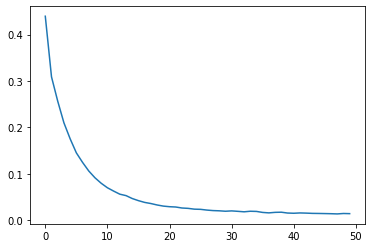

In [ ]:
plot_training_loss(loss_epoch)

In [ ]:
def plot_acc_scores(acc_epoch):
    plt.plot(acc_epoch)

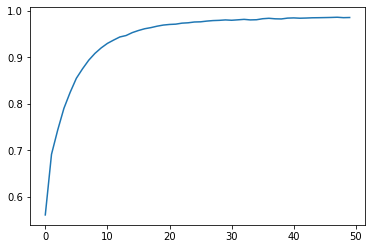

In [ ]:
plot_acc_scores(acc_epoch)

# Print Predictions

In [ ]:
def visualize_segmentation(model, data_loader, num_samples=5, device='cuda'):
     #visualize segmentation on unseen samples
    fig, axs = plt.subplots(num_samples, 3, figsize=(30,30))

    for ax, col in zip(axs[0], ['MRI','MRI with Mask', 'MRI with Prediciton']):
        ax.set_title(col)

    index = 0
    for i,batch in enumerate(data_loader):

            img = batch[0].to(device)
            msk = batch[1].to(device)

            output = model(img)
            
            for j in range(batch[0].size()[0]): #iterate over batchsize
                
                axs[index,0].imshow(np.transpose(img[j].detach().cpu().numpy(), (1,2,0)).astype(np.float32), cmap='bone', interpolation='none')
                axs[index,1].imshow(np.transpose(img[j].detach().cpu().numpy(), (1,2,0)).astype(np.float32), cmap='bone', interpolation='none')
                axs[index,1].imshow(torch.squeeze(msk[j]).detach().cpu().numpy(), cmap='Reds', interpolation='none', alpha=0.5)
                axs[index,2].imshow(np.transpose(img[j].detach().cpu().numpy(), (1,2,0)).astype(np.float32), cmap='bone', interpolation='none')
                axs[index,2].imshow(torch.squeeze(output[j]).detach().cpu().numpy(), cmap='Reds', interpolation='none', alpha=0.5)

                
                index += 1
                    
                if index >= num_samples:

                    break 
                    
            if index >= num_samples:
                  
                    break 
            
    plt.tight_layout()

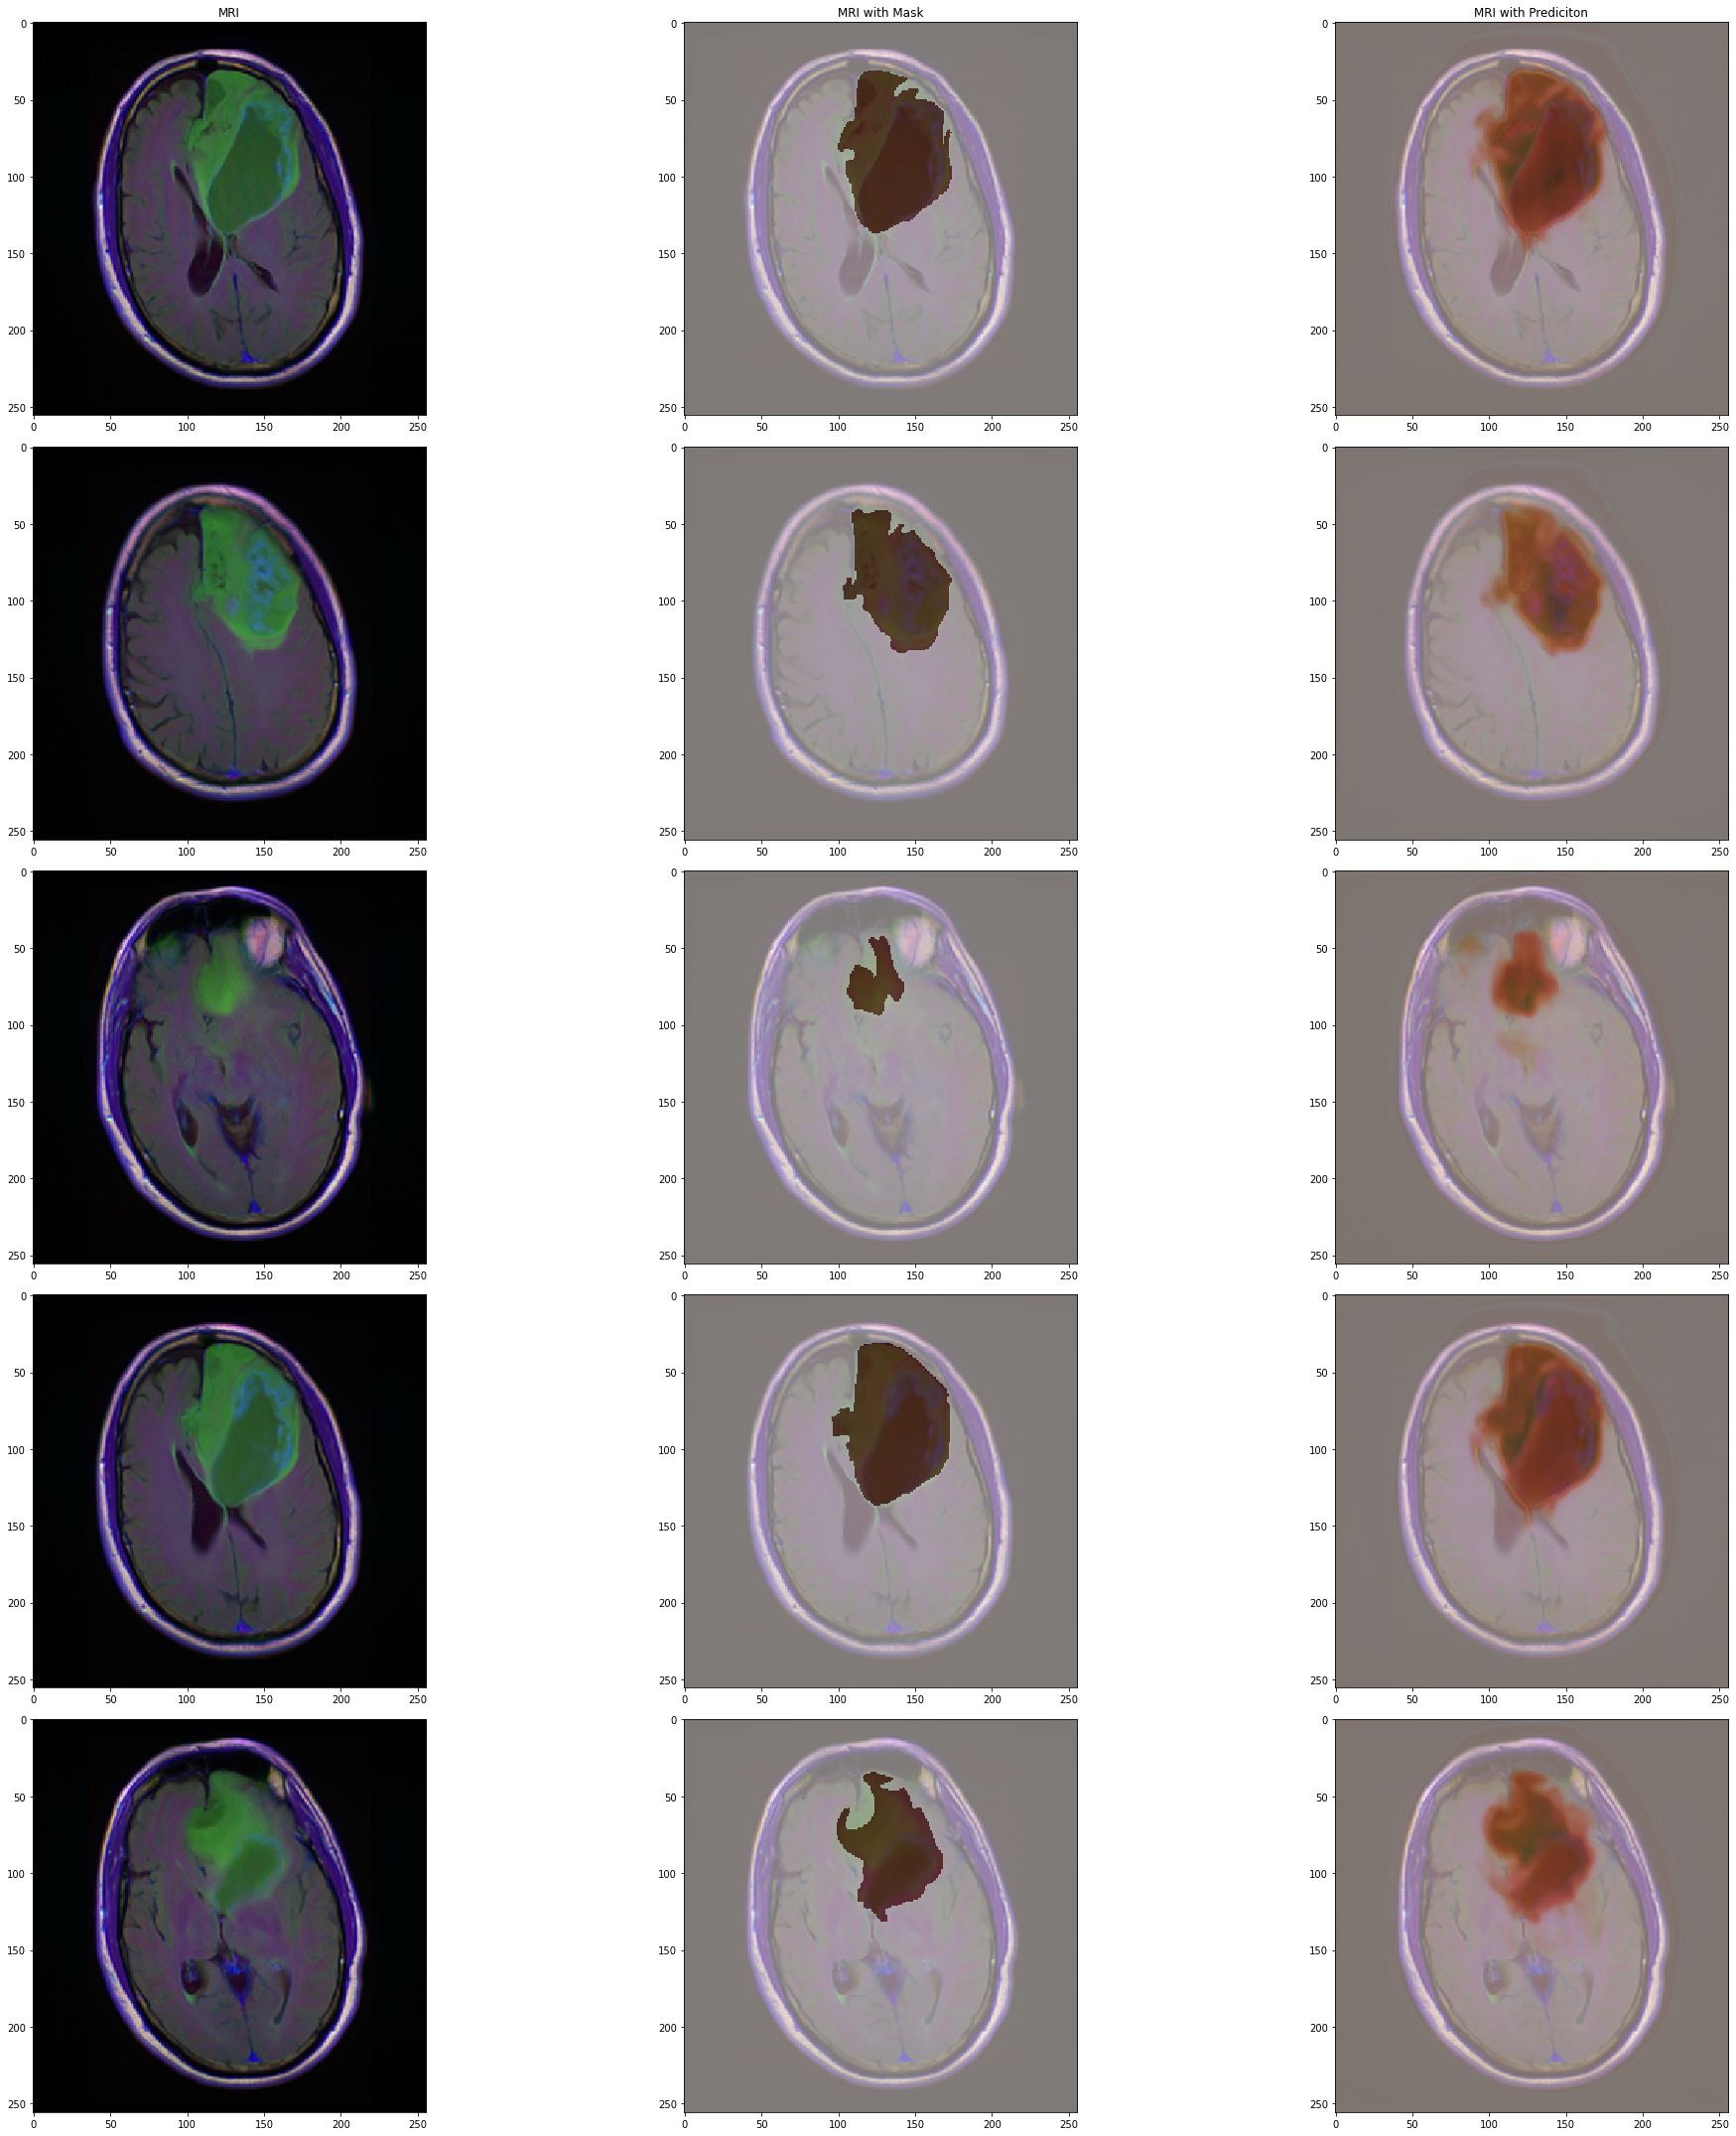

In [ ]:
torch.cuda.empty_cache()
visualize_segmentation(model, val_loader, num_samples=5, device='cuda')

# Test Accuracy

In [ ]:
def Dice_score(val_loader, model, device="cuda"):
    loop = tqdm(val_loader)
    acc_vector = []
    model.eval()
    
    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device=DEVICE)
        targets = targets.float().unsqueeze(1).to(device=DEVICE)
        
        with torch.cuda.amp.autocast():
            predictions = model(data)
            loss = loss_fn(predictions, targets)
            acc_vector.append(1-loss.item())

    return sum(acc_vector)/len(acc_vector)

In [ ]:
def testLoad(val_loader, model, optimizer, loss_fn, device):

    scaler = torch.cuda.amp.GradScaler()

    val_loop = tqdm(val_loader)

    model.eval()

    for batch_idx, (data, targets) in enumerate(val_loop):
        data = data.to(device=DEVICE)
        targets = targets.float().unsqueeze(1).to(device=DEVICE)

        # forward
        with torch.cuda.amp.autocast():
            
            predictions = model(data)

            # ------------------ Accuracy------------------------------------#
            # Dice Score
            test_dice_score = Dice_score(val_loader, model, device=DEVICE)
            print(test_dice_score)
            break

    return True

In [ ]:
torch.cuda.empty_cache()
testLoad(val_loader, model, optimizer, loss_fn, device=DEVICE)


0.7648342308543977


True